In [31]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.io import ascii
from match import match
from astropy import units as u
from astropy.coordinates import SkyCoord
path = '/Users/connor_auge/Research/Disertation/catalogs/' # Path for photometry catalogs


In [16]:
with fits.open('/Users/connor_auge/Research/Disertation/catalogs/cosmos2020/classic/COSMOS2020_CLASSIC_R1_v2.0_master.fits') as hdul:
    cosmos_cols = hdul[1].columns
    cosmos_data = hdul[1].data
    
with fits.open('/Users/connor_auge/Research/Disertation/catalogs/COSMOS2020_CLASSIC_R1_v2.2_p3.fits') as hdul:
    new_cosmos_cols = hdul[1].columns
    new_cosmos_data = hdul[1].data
    
with fits.open('/Users/connor_auge/Research/Disertation/catalogs/cosmos_superdeblended.fit') as hdul:
    fir_cols = hdul[1].columns
    fir_data = hdul[1].data
    
with fits.open('/Users/connor_auge/Research/Disertation/catalogs/chandra_COSMOS_legacy_opt_NIR_counterparts_20160113_4d.fits') as hdul:
    chandra_cols = hdul[1].columns
    chandra_data = hdul[1].data
    
with fits.open('/Users/connor_auge/Research/Disertation/catalogs/COSMOS2015_Laigle+_v1.1.fits') as hdul:
    laigle_cols = hdul[1].columns
    laigle_data = hdul[1].data

In [ ]:
laigle_cols

In [ ]:
chandra_id = chandra_data['id_k_uv']
chandra_Lx = chandra_data['Lx_0510']
chandra_z = chandra_data['z_spec']

laigle_id = laigle_data['NUMBER']
laigle_F24 = laigle_data['Flux_24']

In [ ]:
cosmos_ID = cosmos_data['ID_COSMOS2015']
cosmos_F24 = cosmos_data['FIR_24_FLUX']

cosmos_F24 = cosmos_F24[cosmos_ID > 0]
cosmos_ID = cosmos_ID[cosmos_ID > 0]

fir_ID = fir_data['ID']
fir_F24 = fir_data['F24']

new_ID = new_cosmos_data['ID_COSMOS2015']

In [ ]:
chandra_cond = (chandra_Lx > 43) & (chandra_z < 1.2) & (chandra_z > 0)
chandra_id_samp = chandra_id[chandra_cond]
print(len(chandra_id_samp))

In [ ]:
ix, iy = match(cosmos_ID, chandra_id_samp)

In [ ]:
cosmos_ID_samp = cosmos_ID[ix]
cosmos_F24_samp = cosmos_F24[ix]
print(len(cosmos_ID_samp))

In [ ]:
ix, iy = match(cosmos_ID_samp,laigle_id)

cosmos_F24_match = cosmos_F24_samp[ix]
laigle_F24_match = laigle_F24[ix]
print(len(cosmos_ID_samp[ix]),len(laigle_id[iy]))

In [ ]:
print(cosmos_F24_match)
print(laigle_F24_match)

plt.figure(figsize=(8,8),facecolor='white')
plt.plot(cosmos_F24_match,laigle_F24_match,'.')
plt.show()

In [ ]:
ix, iy = match(cosmos_ID_samp,fir_ID)

In [ ]:
print(len(cosmos_ID_samp),len(fir_ID),len(new_ID))
print(len(cosmos_ID_samp[ix]),len(fir_ID[iy]))



In [ ]:
match_cosmos_F24

In [ ]:
plt.figure(figsize=(8,8),facecolor='white')
plt.plot(cosmos_F24[ix],fir_F24[iy],'.')
plt.show()


In [4]:
path = '/Users/connor_auge/Research/Disertation/catalogs/' # Path for photometry catalogs

# set redshift and X-ray luminosity limits
z_min = 0.0
z_max = 1.2

Lx_min = 43
Lx_max = 60

# set the X-ray luminosity limits for the GOALS sources
goals_Lx_min = 35

###################################################################################
###################################################################################
############################## Read in COSMOS files ###############################

# Read in the data
# COSMOS2020 catalog
cosmos = fits.open(path+'cosmos2020/classic/COSMOS2020_CLASSIC_R1_v2.0_master.fits')
cosmos_data = cosmos[1].data
cosmos.close()

# COSMOS2020 catalog
# cosmos = fits.open(path+'COSMOS2020_CLASSIC_R1_v2.2_p3.fits')
# cosmos_data = cosmos[1].data
# cosmos.close()

# COSMOS FIR catalog 
cosmos_fir = fits.open(path+'cosmos_superdeblended.fit')
cosmos_fir_data = cosmos_fir[1].data
cosmos.close()

# Chandra 2016 catalog
chandra_cosmos = fits.open(path+'chandra_COSMOS_legacy_opt_NIR_counterparts_20160113_4d.fits')
chandra_cosmos_data = chandra_cosmos[1].data
chandra_cosmos.close()

# Chandra updated fits catalog
chandra_cosmos2 = fits.open(path+'chandra_cosmos_legacy_spectra_bestfit_20210225.fits')
chandra_cosmos2_data = chandra_cosmos2[1].data
chandra_cosmos2.close()

# Chandra compton thick catalog
chandra_cosmos_ct = fits.open(path+'chandra_cosmos_legacy_spectra_bestfit_ComptonThick_Lanzuisi18.fits')
chandra_cosmos_ct_data = chandra_cosmos_ct[1].data
chandra_cosmos_ct.close()

# DEIMOS 10k Spec z cat
deimos = ascii.read('/Users/connor_auge/Downloads/deimos_10k_March2018_new/deimos_redshifts.tbl')
deimos_id = np.asarray(deimos['ID'])
deimos_z = np.asarray(deimos['zspec'])
deimos_remarks = np.asarray(deimos['Remarks'])
deimos_ID = np.asarray([int(i[1:]) for i in deimos_id if 'L' in i])
deimos_z_spec = np.asarray([deimos_z[i] for i in range(len(deimos_z)) if 'L' in deimos_id[i]])

# Gather all IDs
chandra_cosmos_phot_id = chandra_cosmos_data['id_k_uv']
cosmos_laigle_id = cosmos_data['ID_COSMOS2015']
cosmos_fir_id = cosmos_fir_data['ID']
cosmos_xid = cosmos_data['id_chandra']
chandra_cosmos_xid = chandra_cosmos_data['id_x']
chandra_cosmos2_xid = chandra_cosmos2_data['id_x']
chandra_cosmos_ct_xid = chandra_cosmos_ct_data['id_x']

# X-ray coords
chandra_cosmos_RA = chandra_cosmos_data['RA_x']
chandra_cosmos_DEC = chandra_cosmos_data['DEC_x']

# Redshfits
# cosmos_sz = cosmos_data['sz_zspec']
# cosmos_ez = cosmos_data['ez_z_spec']
chandra_cosmos_z = chandra_cosmos_data['z_spec']
chandra_cosmos_z_phot = chandra_cosmos_data['z_best']

chandra_cosmos2_z = chandra_cosmos2_data['z_best']

# X-ray Flux
chandra_cosmos_Fx_hard = chandra_cosmos_data['flux_h']
chandra_cosmos_Fx_soft = chandra_cosmos_data['flux_s']
chandra_cosmos_Fx_full = chandra_cosmos_data['flux_f']

chandra_cosmos2_Fx_hard = chandra_cosmos2_data['flux_210']
chandra_cosmos2_Fx_soft = chandra_cosmos2_data['flux_052']
chandra_cosmos2_Fx_full = chandra_cosmos2_data['flux_0510']

# X-ray Luminosity (non-log)
chandra_cosmos_Lx_hard = np.asarray([10**i for i in chandra_cosmos_data['Lx_210']])
chandra_cosmos_Lx_soft = np.asarray([10**i for i in chandra_cosmos_data['Lx_052']])
chandra_cosmos_Lx_full = np.asarray([10**i for i in chandra_cosmos_data['Lx_0510']])

chandra_cosmos2_Lx_hard = np.asarray([10**i for i in chandra_cosmos2_data['Lx_210']])
chandra_cosmos2_Lx_full = np.asarray([(10**i)*1.64 for i in chandra_cosmos2_data['Lx_210']]) # Correction from hard to full band

# Other Chandra Data
# Spec-type from hardness ratio
chandra_cosmos_spec_type = chandra_cosmos_data['spec_type'] # spec type

# Column Density
chandra_cosmos_nh = chandra_cosmos_data['Nh']
chandra_cosmos_nh_lo = chandra_cosmos_data['Nh_lo']
chandra_cosmos_nh_hi = chandra_cosmos_data['Nh_up']

chandra_cosmos2_nh = chandra_cosmos2_data['nh']
chandra_cosmos2_nh_lo_err = chandra_cosmos2_data['nh_lo_err']
chandra_cosmos2_nh_up_err = chandra_cosmos2_data['nh_up_err']


# Absorption Correction - full, hard, and soft bands with uppr and lower limts
chandra_cosmos_abs_corr_h = chandra_cosmos_data['abs_corr_210'] 
chandra_cosmos_abs_corr_up_h = chandra_cosmos_data['abs_corr_210_up']
chandra_cosmos_abs_corr_lo_h = chandra_cosmos_data['abs_corr_210_lo']
chandra_cosmos_abs_corr_s = chandra_cosmos_data['abs_corr_052']
chandra_cosmos_abs_corr_up_s = chandra_cosmos_data['abs_corr_052_up']
chandra_cosmos_abs_corr_lo_s = chandra_cosmos_data['abs_corr_052_lo']
chandra_cosmos_abs_corr_f = chandra_cosmos_data['abs_corr_0510']
chandra_cosmos_abs_corr_up_f = chandra_cosmos_data['abs_corr_0510_up']
chandra_cosmos_abs_corr_lo_f = chandra_cosmos_data['abs_corr_0510_lo']


# X-ray luminosities and Column densites from the Chandra Compoton thick catalog
chandra_cosmos_ct_Lx_hard_obs = np.asarray([10**i for i in chandra_cosmos_ct_data['loglx']])
chandra_cosmos_ct_Lx_full_obs = np.asarray([(10**i)*1.64 for i in chandra_cosmos_ct_data['loglx']])
chandra_cosmos_ct_Lx_hard = np.asarray([10**i for i in chandra_cosmos_ct_data['loglxcor']])
chandra_cosmos_ct_Lx_full = np.asarray([(10**i)*1.64 for i in chandra_cosmos_ct_data['loglxcor']])
chandra_cosmos_ct_nh = chandra_cosmos_ct_data['nh2_22']

# Gather DEIMOS spec redshifts to redshift array
for i in range(len(chandra_cosmos_z)):
    ind = np.where(deimos_ID == chandra_cosmos_phot_id[i])[0]
    if len(ind) > 0:
        if deimos_z_spec[ind][0] > 0:
            chandra_cosmos_z[i] = deimos_z_spec[ind][0]
        else:
            continue
    else:
        continue

# Gather Luminosity absorption corrections from the Chandra COSMOS cat1 and correct the luminositeis
abs_corr_use_h = []
abs_corr_use_s = []
abs_corr_use_f = []
check_abs = []
for i in range(len(chandra_cosmos_abs_corr_f)):
    if chandra_cosmos_abs_corr_f[i] != -99.0:
        abs_corr_use_f.append(chandra_cosmos_abs_corr_f[i])
        abs_corr_use_h.append(chandra_cosmos_abs_corr_h[i])
        abs_corr_use_s.append(chandra_cosmos_abs_corr_s[i])
        check_abs.append(0)

    elif chandra_cosmos_abs_corr_up_f[i] != -99.0:
        abs_corr_use_f.append(chandra_cosmos_abs_corr_up_f[i])
        abs_corr_use_h.append(chandra_cosmos_abs_corr_up_h[i])
        abs_corr_use_s.append(chandra_cosmos_abs_corr_up_s[i])
        check_abs.append(1)

    elif chandra_cosmos_abs_corr_lo_f[i] != -99.0:
        abs_corr_use_f.append(chandra_cosmos_abs_corr_lo_f[i])
        abs_corr_use_h.append(chandra_cosmos_abs_corr_lo_h[i])
        abs_corr_use_s.append(chandra_cosmos_abs_corr_lo_s[i])
        check_abs.append(2)

    else:
        print('NO GOOD ABSORPTION CORRECTION DATA')

check_abs = np.asarray(check_abs)
# Turn final absorption lists into arrays
abs_corr_use_h = np.asarray(abs_corr_use_h)
abs_corr_use_s = np.asarray(abs_corr_use_s)
abs_corr_use_f = np.asarray(abs_corr_use_f)

# Correct the X-ray luminosity from the 2016 Chandra Catalog for absorption
chandra_cosmos_Lx_hard /= abs_corr_use_h
chandra_cosmos_Lx_soft /= abs_corr_use_s
chandra_cosmos_Lx_full /= abs_corr_use_f

# Gather the column density from the three chandra catalogs for the full and hard band Lx
chandra_cosmos_Nh = []
check = []
cosmos_Nh_check = []
for i in range(len(chandra_cosmos_Lx_full)):    
    ind = np.where(chandra_cosmos2_xid == chandra_cosmos_xid[i])[0] # Check if there is a match to updated Chandra catalog 
    ind_ct = np.where(chandra_cosmos_ct_xid == chandra_cosmos_xid[i])[0] # Check if there is a match to compton thick Chandra catalog 

    if len(ind_ct) > 0:
        chandra_cosmos_Nh.append(chandra_cosmos_ct_nh[ind_ct][0]) # if there is a match append Nh from compton thick catalog 
        chandra_cosmos_Lx_hard[i] = chandra_cosmos_ct_Lx_hard[ind_ct] # replace Lx from original Chandra catalog with that from the CT cat
        chandra_cosmos_Lx_full[i] = chandra_cosmos_ct_Lx_full[ind_ct]
        check.append(3) # count which catalog data is from
        cosmos_Nh_check.append(0)
        check_abs[i] = 0

    elif len(ind) > 0:
        chandra_cosmos_Lx_hard[i] = chandra_cosmos2_Lx_hard[ind] # replace Lx from orginal Chandra catalog with that from updated cat
        chandra_cosmos_Lx_full[i] = chandra_cosmos2_Lx_full[ind]
        check_abs[i] = 0
        if chandra_cosmos2_nh_lo_err[ind][0] == -99.:
            chandra_cosmos_Nh.append(chandra_cosmos2_nh[ind][0]+chandra_cosmos2_nh_up_err[ind][0]) # if there is Nh upper limit in updated cat append to Nh list
            # chandra_cosmos_Nh.append(0.0)
            check.append(2.5)
            cosmos_Nh_check.append(1)
        else:
            chandra_cosmos_Nh.append(chandra_cosmos2_nh[ind][0]) # if there is a match append Nh from updated catalog
            check.append(2)
            cosmos_Nh_check.append(0)
    else: # if no matches to updated or CT catalogs take Nh value from original catalog
        if chandra_cosmos_nh[i] == -99.: # If no good value take upper or lower limits 
            if chandra_cosmos_nh_lo[i] != -99.:
                # chandra_cosmos_Nh.append(0.0)
                chandra_cosmos_Nh.append(chandra_cosmos_nh_lo[i])
                cosmos_Nh_check.append(2)
            else:
                # chandra_cosmos_Nh.append(0.0)
                chandra_cosmos_Nh.append(chandra_cosmos_nh_hi[i])
                cosmos_Nh_check.append(1)
        else:    
            chandra_cosmos_Nh.append(chandra_cosmos_nh[i])
            cosmos_Nh_check.append(0)
        check.append(1)
chandra_cosmos_Nh = np.asarray(chandra_cosmos_Nh)*1E22
check = np.asarray(check)
cosmos_Nh_check = np.asarray(cosmos_Nh_check)


print('COSMOS All Lx cat: ', len(chandra_cosmos_Lx_full))

# Limit chandra sample to sources in z and Lx range
cosmos_condition = (chandra_cosmos_z > z_min) & (chandra_cosmos_z <= z_max) & (np.log10(chandra_cosmos_Lx_full) >= Lx_min) & (np.log10(chandra_cosmos_Lx_full) <= Lx_max) & (chandra_cosmos_phot_id != -99.)
# cosmos_condition = (chandra_cosmos_z > z_min) & (chandra_cosmos_z <= z_max) & (np.log10(chandra_cosmos_Lx_hard) >= Lx_min) & (np.log10(chandra_cosmos_Lx_hard) <= Lx_max) & (chandra_cosmos_phot_id != -99.)

chandra_cosmos_phot_id = chandra_cosmos_phot_id[cosmos_condition]
chandra_cosmos_xid = chandra_cosmos_xid[cosmos_condition]
chandra_cosmos_RA = chandra_cosmos_RA[cosmos_condition]
chandra_cosmos_DEC = chandra_cosmos_DEC[cosmos_condition]
chandra_cosmos_z = chandra_cosmos_z[cosmos_condition]
chandra_cosmos_Fx_full = chandra_cosmos_Fx_full[cosmos_condition]
chandra_cosmos_Fx_hard = chandra_cosmos_Fx_hard[cosmos_condition]
chandra_cosmos_Fx_soft = chandra_cosmos_Fx_soft[cosmos_condition]
chandra_cosmos_Lx_full = chandra_cosmos_Lx_full[cosmos_condition]
chandra_cosmos_Lx_hard = chandra_cosmos_Lx_hard[cosmos_condition]
chandra_cosmos_Lx_soft = chandra_cosmos_Lx_soft[cosmos_condition]
chandra_cosmos_spec_type = chandra_cosmos_spec_type[cosmos_condition]
chandra_cosmos_Nh = chandra_cosmos_Nh[cosmos_condition]
cosmos_Nh_check = cosmos_Nh_check[cosmos_condition]
abs_corr_use_h = abs_corr_use_h[cosmos_condition]
abs_corr_use_s = abs_corr_use_s[cosmos_condition]
abs_corr_use_f = abs_corr_use_f[cosmos_condition]
check_abs = check_abs[cosmos_condition]
print('COSMOS Lx z: ', len(chandra_cosmos_phot_id))




COSMOS All Lx cat:  4016
COSMOS Lx z:  682


In [50]:
# Match chandra subsample to photometry catalog
cosmos_ix, cosmos_iy = match(chandra_cosmos_phot_id,cosmos_laigle_id) # match cats based on laigle ID
# cosmos_ix, cosmos_iy = match(chandra_cosmos_xid,cosmos_xid) # match cats based on chandra ID in COSMOS2020

cosmos_laigle_id_match = cosmos_laigle_id[cosmos_iy]
chandra_cosmos_phot_id_match = chandra_cosmos_phot_id[cosmos_ix]
chandra_cosmos_xid_match = chandra_cosmos_xid[cosmos_ix]
chandra_cosmos_RA_match = chandra_cosmos_RA[cosmos_ix]
chandra_cosmos_DEC_match = chandra_cosmos_DEC[cosmos_ix]
chandra_cosmos_z_match = chandra_cosmos_z[cosmos_ix]
chandra_cosmos_Fx_full_match = chandra_cosmos_Fx_full[cosmos_ix]
chandra_cosmos_Fx_hard_match = chandra_cosmos_Fx_hard[cosmos_ix]
chandra_cosmos_Fx_soft_match = chandra_cosmos_Fx_soft[cosmos_ix]
chandra_cosmos_Lx_full_match = chandra_cosmos_Lx_full[cosmos_ix]
chandra_cosmos_Lx_hard_match = chandra_cosmos_Lx_hard[cosmos_ix]
chandra_cosmos_Lx_soft_match = chandra_cosmos_Lx_soft[cosmos_ix]
chandra_cosmos_spec_type_match = chandra_cosmos_spec_type[cosmos_ix]
chandra_cosmos_Nh_match = chandra_cosmos_Nh[cosmos_ix]
cosmos_Nh_check_match = cosmos_Nh_check[cosmos_ix]
abs_corr_use_h_match = abs_corr_use_h[cosmos_ix]
abs_corr_use_s_match = abs_corr_use_s[cosmos_ix]
abs_corr_use_f_match = abs_corr_use_f[cosmos_ix]
check_abs_match = check_abs[cosmos_ix]

In [51]:
cosmos_F24 = cosmos_data['FIR_24_FLUX'][cosmos_iy]
cosmos_F100 = cosmos_data['FIR_100_FLUX'][cosmos_iy]
cosmos_F250 = cosmos_data['FIR_250_FLUX'][cosmos_iy]
print(len(cosmos_F24))
print(len(cosmos_F24[cosmos_F24 > 0]))


664
597


In [10]:
# Match chandra subsample to photometry catalog
cosmos_ix, cosmos_iy = match(chandra_cosmos_phot_id,cosmos_fir_id)# match cats based on laigle ID


In [15]:
cosmos_fir_F24 = cosmos_fir_data['F24'][cosmos_iy]
print(len(cosmos_fir_F24))

10


In [52]:
laigle_id = laigle_data['NUMBER']
cosmos_ix, cosmos_iy = match(chandra_cosmos_phot_id,laigle_id)# match cats based on laigle ID


In [53]:
laigle_F24 = laigle_data['Flux_24'][cosmos_iy]
laigle_F100 = laigle_data['Flux_100'][cosmos_iy]*1000
laigle_F250 = laigle_data['Flux_250'][cosmos_iy]*1000

laigle_id_match = laigle_id[cosmos_iy]
print(len(laigle_F24))
print(len(laigle_F24[laigle_F24 > 0]))


682
570


In [36]:
ix, iy = match(cosmos_laigle_id_match,laigle_id_match)

In [56]:
laigle_F24_match = laigle_F24[iy]
laigle_F100_match = laigle_F100[iy]
laigle_F250_match = laigle_F250[iy]

cosmos_F24_match = cosmos_F24[ix]
cosmos_F100_match = cosmos_F100[ix]
cosmos_F250_match = cosmos_F250[ix]
laigle_id_match_match = laigle_id_match[iy]

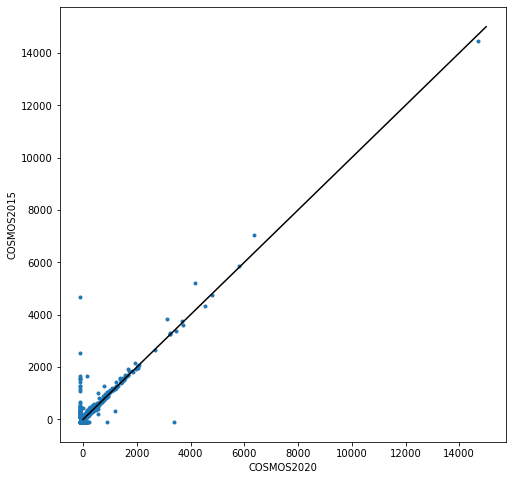

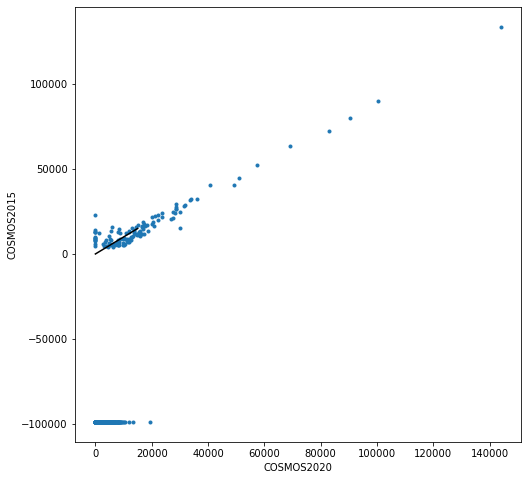

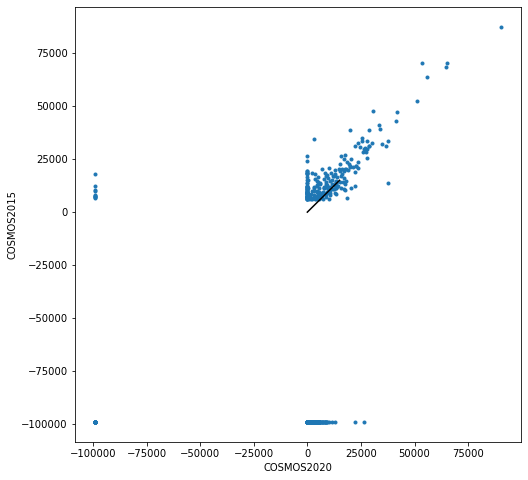

In [58]:
plt.figure(figsize=(8,8),facecolor='w')
plt.plot(cosmos_F24_match,laigle_F24_match,'.')
plt.plot(np.linspace(0,15000,100),np.linspace(0,15000,100),color='k')
plt.xlabel('COSMOS2020')
plt.ylabel('COSMOS2015')
plt.show()

plt.figure(figsize=(8,8),facecolor='w')
plt.plot(cosmos_F100_match,laigle_F100_match,'.')
plt.plot(np.linspace(0,15000,100),np.linspace(0,15000,100),color='k')
plt.xlabel('COSMOS2020')
plt.ylabel('COSMOS2015')
plt.show()

plt.figure(figsize=(8,8),facecolor='w')
plt.plot(cosmos_F250_match,laigle_F250_match,'.')
plt.plot(np.linspace(0,15000,100),np.linspace(0,15000,100),color='k')
plt.xlabel('COSMOS2020')
plt.ylabel('COSMOS2015')
plt.show()

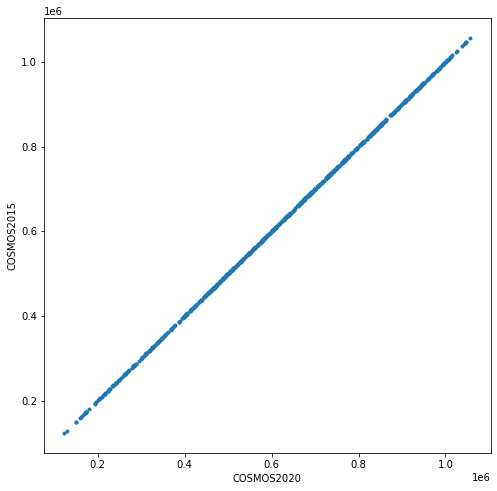

In [38]:
plt.figure(figsize=(8,8),facecolor='w')
plt.plot(cosmos_laigle_id_match,laigle_id_match_match,'.')
# plt.plot(np.linspace(0,15000,100),np.linspace(0,15000,100),color='k')
plt.xlabel('COSMOS2020')
plt.ylabel('COSMOS2015')
plt.show()

In [46]:
print(laigle_data['Flux_24'][laigle_data['Flux_24'] > 0])
print(cosmos_data['fir_24_flux'][cosmos_data['fir_24_flux'] > 0])

[1241.   61.  161. ...  378.  444.  192.]
[126.411     79.882706 135.827    ... 100.698     27.557999 310.687   ]


In [47]:
laigle_cols

ColDefs(
    name = 'ALPHA_J2000'; format = '1D'; unit = 'deg'
    name = 'DELTA_J2000'; format = '1D'; unit = 'deg'
    name = 'NUMBER'; format = 'K'
    name = 'X_IMAGE'; format = '1D'
    name = 'Y_IMAGE'; format = '1D'
    name = 'ERRX2_IMAGE'; format = '1D'
    name = 'ERRY2_IMAGE'; format = '1D'
    name = 'ERRXY_IMAGE'; format = '1D'
    name = 'FLAG_HJMCC'; format = '1I'
    name = 'FLUX_RADIUS'; format = '1E'; unit = 'pixel'
    name = 'KRON_RADIUS'; format = '1E'
    name = 'EBV'; format = '1E'
    name = 'FLAG_PETER'; format = 'I'
    name = 'FLAG_COSMOS'; format = 'I'
    name = 'FLAG_DEEP'; format = 'I'
    name = 'FLAG_SHALLOW'; format = 'I'
    name = 'Ks_FLUX_APER2'; format = '1E'; unit = 'uJy'
    name = 'Ks_FLUXERR_APER2'; format = '1E'; unit = 'uJy'
    name = 'Ks_FLUX_APER3'; format = '1E'; unit = 'uJy'
    name = 'Ks_FLUXERR_APER3'; format = '1E'; unit = 'uJy'
    name = 'Ks_MAG_APER2'; format = '1E'; unit = 'mag'
    name = 'Ks_MAGERR_APER2'; format = '1E'; unit =

In [109]:
# Check appendix files 
with fits.open('/Users/connor_auge/Research/Disertation/catalogs/output/AGN_Properties7.fits') as hdul:
    props_cols = hdul[1].columns
    props_data = hdul[1].data
    
with fits.open('/Users/connor_auge/Research/Disertation/catalogs/output/AGN_photometry_cosmos7.fits') as hdul:
    cosmos_cols = hdul[1].columns
    cosmos_data = hdul[1].data
    
with fits.open('/Users/connor_auge/Research/Disertation/catalogs/output/AGN_photometry_s82x7.fits') as hdul:
    s82x_cols = hdul[1].columns
    s82x_data = hdul[1].data
    
with fits.open('/Users/connor_auge/Research/Disertation/catalogs/output/AGN_photometry_goods7.fits') as hdul:
    goods_cols = hdul[1].columns
    goods_data = hdul[1].data

In [110]:
props_cols

ColDefs(
    name = 'Field'; format = '32A'
    name = 'x_ID'; format = '32A'
    name = 'phot_id'; format = '32A'
    name = 'RAJ2000'; format = '32A'
    name = 'DEJ2000'; format = '32A'
    name = 'L0510_c'; format = 'D'
    name = 'z_spec'; format = 'D'
    name = 'Nh'; format = 'D'
    name = 'Lbol'; format = 'D'
    name = 'SED_shape'; format = 'D'
)

In [111]:
print(type(props_data['L0510_c'][0]))

<class 'numpy.float64'>


In [112]:
for i in range(len(props_data)):
    print(props_data['Field'][i],props_data['x_ID'][i],props_data['phot_id'][i],
         props_data['RAJ2000'][i],props_data['DEJ2000'][i],props_data['L0510_c'][i],props_data['z_spec'][i],
         props_data['Nh'][i],props_data['Lbol'][i],props_data['SED_shape'][i])

COSMOS lid_1217 123228 09h59m45.0307428s +01d28m28.6445203s 44.275 1.029 22.045 45.482 2.0
COSMOS lid_1210 128954 09h59m34.38412368s +01d28m48.96262715s 45.035 1.16 21.78 45.671 2.0
COSMOS lid_1218 150058 09h59m45.62690976s +01d30m32.13303919s 44.295 1.106 22.313 45.789 2.0
COSMOS lid_1252 150214 10h00m13.72519824s +01d30m34.83321278s 44.305 0.851 20.954 45.577 2.0
COSMOS lid_1247 158738 10h00m06.33626544s +01d31m23.21169326s 43.365 1.042 -inf 44.974 3.0
COSMOS lid_1560 161349 10h01m59.85819192s +01d31m35.20264973s 44.075 0.977 22.235 45.409 2.0
COSMOS lid_1253 164133 10h00m15.38332944s +01d31m46.92705762s 45.035 1.031 21.782 45.617 3.0
COSMOS lid_1202 167601 10h00m26.67996936s +01d32m35.29003319s 43.525 0.285 23.268 44.534 3.0
COSMOS lid_1224 169542 09h59m54.80496864s +01d32m06.5247234s 43.595 0.481 21.114 45.061 2.0
COSMOS lid_1189 171771 09h58m49.01919648s +01d32m20.18050058s 44.435 0.364 21.059 44.849 5.0
COSMOS lid_3611 172047 09h59m55.14715632s +01d32m32.56883387s 43.148 0.623 23

COSMOS cid_919 549676 10h00m39.73079693s +02d08m00.81606732s 43.445 0.838 21.74 45.092 3.0
COSMOS cid_949 550062 10h00m59.483997s +02d08m10.82172228s 43.365 0.895 21.875 44.771 4.0
COSMOS cid_313 554361 09h59m07.64879729s +02d08m21.1411968s 43.415 0.354 21.288 44.662 3.0
COSMOS cid_538 555407 10h01m44.50193952s +02d08m33.95901631s 43.785 0.967 21.869 45.134 3.0
COSMOS cid_1126 558222 10h00m04.54319266s +02d08m52.21281732s 44.075 0.959 22.704 45.302 3.0
COSMOS cid_323 558556 09h58m33.13589856s +02d08m58.56982656s 43.955 0.952 22.493 44.985 3.0
COSMOS cid_549 560030 10h01m57.21495384s +02d09m01.6230267s 43.375 0.876 22.04 44.879 3.0
COSMOS cid_332 560331 09h59m44.81039914s +02d08m57.6023244s 43.755 0.958 21.806 45.233 3.0
COSMOS cid_319 560530 09h59m17.16239978s +02d09m07.39292508s 43.515 1.052 22.444 44.802 5.0
COSMOS cid_753 561903 10h02m10.01855616s +02d09m15.32795231s 43.455 0.822 22.876 44.738 4.0
COSMOS lid_1628 565402 10h02m56.07077736s +02d09m23.87661131s 44.075 0.979 22.045 45.7

COSMOS lid_1848 830133 09h58m20.52977304s +02d33m30.10057614s 43.765 0.961 22.538 45.499 4.0
COSMOS lid_713 831978 09h58m34.64038728s +02d33m37.62520546s 43.885 1.0 23.207 45.695 3.0
COSMOS cid_991 833950 10h00m06.41167896s +02d33m43.21455865s 43.665 0.745 21.839 44.678 5.0
COSMOS lid_277 834538 10h02m13.41084432s +02d33m51.62940439s 43.765 1.143 21.892 45.33 3.0
COSMOS cid_571 834892 09h59m11.13434736s +02d33m51.6127271s 43.455 0.704 22.84 45.002 2.0
COSMOS cid_116 836473 10h00m41.11612296s +02d33m50.95834628s 43.605 0.501 21.443 44.291 5.0
COSMOS lid_266 837822 10h02m43.93926192s +02d34m28.67997698s 43.755 0.376 21.265 44.812 3.0
COSMOS cid_569 838188 09h59m06.71716584s +02d34m01.74988222s 43.555 0.727 21.829 44.877 3.0
COSMOS lid_145 839943 10h02m51.26372496s +02d34m22.75807843s 43.795 0.893 21.591 44.827 3.0
COSMOS cid_573 840220 09h59m13.50299712s +02d34m21.31586785s 43.104 0.958 22.756 44.838 4.0
COSMOS cid_576 841354 09h59m14.38461408s +02d34m34.84212992s 44.335 0.972 23.758 45.

Stripe82X 3487 3487 01h15m20.84014893s +00d22m43.71703148s 43.96 1.01538 -inf 45.753 3.0
Stripe82X 3488 3488 01h15m22.10174561s +00d15m16.98192358s 44.137 0.3901896 22.186 45.104 5.0
Stripe82X 3492 3492 01h15m25.49743652s -00d05m35.71262956s 44.652 0.883296 23.379 45.41 3.0
Stripe82X 3504 3504 01h15m36.03149414s +00d33m51.92052841s 44.065 0.3638278 20.217 44.793 3.0
Stripe82X 3505 3505 01h15m36.9090271s -00d00m12.40184046s 43.828 0.5317925 21.679 45.762 3.0
Stripe82X 3511 3511 01h15m39.61669922s -00d21m58.64808798s 44.792 0.986199 20.164 46.085 1.0
Stripe82X 3517 3517 01h15m43.98605347s +00d20m13.95149231s 44.525 1.052316 20.361 46.036 1.0
Stripe82X 3540 3540 01h16m09.82131958s -00d18m02.11394548s 43.68 0.3878846 20.673 45.144 3.0
Stripe82X 3544 3544 01h16m14.66674805s +00d13m02.50315189s 44.576 0.895596 22.456 45.355 3.0
Stripe82X 3547 3547 01h16m19.29199219s +00d16m00.63627005s 43.087 0.344141 -inf 44.984 4.0
Stripe82X 3552 3552 01h16m22.5668335s +00d07m37.26953745s 43.892 1.124353 2

Stripe82X 5135 5135 01h50m47.51037598s -00d12m35.36043048s 43.132 0.172554 20.142 44.215 4.0
Stripe82X 5136 5136 01h50m48.03451538s -00d17m56.43055916s 43.567 0.783021 -inf 45.319 3.0
Stripe82X 5139 5139 01h50m53.61877441s -00d09m06.22140527s 44.158 0.7808984 20.333 45.136 3.0
Stripe82X 5142 5142 01h50m55.78353882s -00d05m07.78431594s 43.406 0.4247346 20.172 44.793 5.0
Stripe82X 5143 5143 01h50m56.55258179s -00d06m22.62639642s 43.818 0.3699533 22.866 44.859 4.0
Stripe82X 5146 5146 01h50m57.24060059s -00d03m09.80834484s 43.032 0.4268156 20.319 45.084 4.0
Stripe82X 5148 5148 01h51m01.30874634s -00d20m19.8527813s 43.938 1.0100262 20.688 45.387 3.0
Stripe82X 5151 5151 01h51m05.67123413s -00d34m26.01612568s 44.334 0.33504 20.095 45.145 2.0
Stripe82X 5155 5155 01h51m07.84057617s -00d21m19.99713421s 43.842 0.98477006 20.719 45.643 1.0
Stripe82X 5158 5158 01h51m09.73022461s -00d16m08.0098772s 44.957 1.14675 23.081 45.747 3.0
Stripe82X 5162 5162 01h51m12.7166748s -00d15m28.41693163s 44.367 1.14

In [113]:
cosmos_cols

ColDefs(
    name = 'Field'; format = '32A'
    name = 'phot_id'; format = '32A'
    name = 'Fxh'; format = 'D'
    name = 'Fxh_err'; format = 'D'
    name = 'Fxs'; format = 'D'
    name = 'Fxs_err'; format = 'D'
    name = 'FUV'; format = 'D'
    name = 'FUV_err'; format = 'D'
    name = 'NUV'; format = 'D'
    name = 'NUV_err'; format = 'D'
    name = 'u'; format = 'D'
    name = 'u_err'; format = 'D'
    name = 'g'; format = 'D'
    name = 'g_err'; format = 'D'
    name = 'r'; format = 'D'
    name = 'r_err'; format = 'D'
    name = 'i'; format = 'D'
    name = 'i_err'; format = 'D'
    name = 'z'; format = 'D'
    name = 'z_err'; format = 'D'
    name = 'y'; format = 'D'
    name = 'y_err'; format = 'D'
    name = 'J'; format = 'D'
    name = 'J_err'; format = 'D'
    name = 'H'; format = 'D'
    name = 'H_err'; format = 'D'
    name = 'Ks'; format = 'D'
    name = 'Ks_err'; format = 'D'
    name = 'IRAC1'; format = 'D'
    name = 'IRAC1_err'; format = 'D'
    name = 'IRAC2'; forma

In [114]:
for i in cosmos_cols.names:
    print(i,cosmos_data[i][0],cosmos_data[i][1],cosmos_data[i][2],cosmos_data[i][3])

Field COSMOS COSMOS COSMOS COSMOS
phot_id 123228 128954 150058 150214
Fxh 0.000992639921605587 0.005997200030833483 0.0013080100761726499 0.0028176498599350452
Fxh_err 0.00019852798141073433 0.0011994399828836322 0.00026160202105529606 0.0005635299603454769
Fxs 0.004108426626771688 0.015854666009545326 0.0021010879427194595 0.00725178699940443
Fxs_err 0.0008216853602789342 0.0031709333416074514 0.0004202176060061901 0.0014503573765978217
FUV -99.99 1.4380215406417847 1.52087128162384 3.4387152194976807
FUV_err -99.99 0.07865826040506363 0.07870184630155562 0.12168354541063309
NUV 5.714727878570557 4.718706130981445 13.846987724304197 19.714035034179688
NUV_err 0.1250878721475601 0.09191539138555527 0.19028736650943756 0.21828067302703857
u 7.9602365493774405 7.71559190750122 19.132715225219727 17.869731903076172
u_err 0.010635931976139545 0.011575726792216301 0.011780211701989174 0.012126586399972439
g 12.16181182861328 8.110431671142578 24.151296615600582 20.391738891601562
g_err 0.04

In [120]:
np.where(s82x_data['phot_id'] == '2407')

(array([8]),)

In [121]:
for i in s82x_cols.names:
    print(i,s82x_data[i][8],s82x_data[i][9],s82x_data[i][10],s82x_data[i][11])

Field Stripe82X Stripe82X Stripe82X Stripe82X
phot_id 2407 2413 2420 2435
Fxh 0.003906307276338339 0.003819859586656093 0.0016943949740380049 0.0003296138602308929
Fxh_err 0.000781261536758393 0.0007639719406142831 0.00033887900644913316 6.59227735013701e-05
Fxs 0.002660267287865281 0.013725039549171923 0.0034641758538782592 0.0006448024068959056
Fxs_err 0.0005320534110069275 0.0027450080960989 0.0006928351940587163 0.0001289604842895642
FUV 30.169451682808607 -99.99 -99.99 -99.99
FUV_err 1.4920132085369135 -99.99 -99.99 -99.99
NUV 68.00746926260135 -99.99 -99.99 -99.99
NUV_err 1.3834243956897647 -99.99 -99.99 -99.99
u 95.40569148509994 31.941388719050593 2.7938956298178184 35.19067653050851
u_err 1.8604110223441495 1.089201349417674 0.7786586955105338 1.161292319214198
g 116.71527277009557 49.68047783379235 8.283344480414621 39.97088629575443
g_err 0.7703207961085674 0.5067408921900133 0.32719212203501474 0.46765935697377803
r 110.13697391404507 53.73290610741736 27.49504655437057 47.

In [125]:
np.where(goods_data['phot_id'] == '1118')

(array([82]),)

In [126]:
for i in goods_cols.names:
    print(i,goods_data[i][7],goods_data[i][8],goods_data[i][82],goods_data[i][83])

Field GOODS-N GOODS-N GOODS-S GOODS-S
phot_id 6273 4663 1118 9026
Fxh 0.00011890999999999998 0.00011890999999999998 4.3944999999999993e-05 0.00019646
Fxh_err 2.3781999999999997e-05 2.3781999999999997e-05 8.788999999999998e-06 3.9291999999999996e-05
Fxs 2.4815999999999998e-05 4.136e-05 0.00012683733333333333 0.00014889599999999995
Fxs_err 4.963199999999999e-06 8.272e-06 2.5367466666666667e-05 2.9779199999999998e-05
FUV -99.99 -99.99 -99.99 -99.99
FUV_err -99.99 -99.99 -99.99 -99.99
NUV -99.99 -99.99 -99.99 0.19047687130526267
NUV_err -99.99 -99.99 -99.99 0.05232132987135739
U -99.99 -99.99 -99.99 -99.99
U_err -99.99 -99.99 -99.99 -99.99
F435W 0.284 0.12815 0.029958599999999995 0.252892
F435W_err 0.03679 0.02617 0.0129856 0.0264913
B 0.3456736289033152 0.23763272538315058 0.029959999999999997 0.25291
B_err 0.04680075261721985 0.03513875110240648 0.01299 0.026489999999999996
V 0.7036330801628848 0.549012520564521 0.11342 0.72917
V_err 0.09784017979664913 0.08286245972880318 0.00669 0.0157

In [115]:
goods_data

FITS_rec([('GOODS-N', '-999',  4.4979e-04,  8.99580e-05,  1.07536000e-03,  2.15072000e-04,   0.4725868 ,  7.18640400e-02,   0.4725868 ,  7.18640400e-02, -99.99, -99.99, -9.99900e+01, -9.99900e+01,  1.36981605e+00,  6.08335306e-02,  4.07314855e+00,  9.31121758e-02, -9.99900000e+01, -9.99900000e+01,   9.97824697,  2.58735944e-01,  1.70323373e+01,  1.70493696e-01, -9.99900e+01, -9.99900e+01, -9.9990e+01, -9.9990e+01,  2.19963311e+01,  2.28541880e-01, -9.99900e+01, -9.99900e+01, -99.99   , -9.9990e+01, -9.9990e+01, -9.9990e+01, -99.99   , -9.9990e+01,  40.19224351,   0.31229373, -99.99      , -9.99900000e+01, -99.99    , -9.99900e+01,  56.65395704,   0.90929601,  65.17278035, 0.66997618,  44.9   , 0.143  ,  40.8   , 0.183  ,  50.2   , 1.7    ,   29.4   , 1.29   ,  110.   ,   7.71  ,   -99.99,  -99.99,   -99.99,  6.1800e+02, -9.9990e+01,  1340.  ,   -99.99,  -99.99,   -99.99,  -99.99,   -99.99,   -99.99),
          ('GOODS-N', '9401',  6.2040e-04,  1.24080e-04,  9.92640000e-05,  1.98528000e

In [108]:
Ra = float(props_data['RAJ2000'][0])
Dec = float(props_data['DEJ2000'][0])
Ra2 = props_data['RAJ2000'][1170]
Dec2 = props_data['DEJ2000'][1170]

print(Ra2,Dec2)

# print(type(Ra),type(Dec))
c1 = SkyCoord(ra=Ra*u.degree,dec=Dec*u.degree)
c2 = SkyCoord(ra=Ra2,dec=Dec2,unit=(u.hourangle, u.deg))
# c = SkyCoord(ra=149.937*u.degree, dec=1.475*u.degree, frame='icrs')
a = c1.to_string('hmsdms').split()
b = c2.to_string('hmsdms').split()
a[0]

ValueError: could not convert string to float: '09h59m45.0307428s'

In [22]:
goodsN_auge = fits.open(path+'GOODsN_full_cat_update.fits')
goodsN_auge_data = goodsN_auge[1].data
goodsN_auge_cols = goodsN_auge[1].columns
goodsN_auge.close()

In [23]:
goodsN_auge_cols

ColDefs(
    name = 'id_xray'; format = 'I'
    name = 'id_rainbow'; format = 'D'
    name = 'xRA'; format = '11A'
    name = 'xDec'; format = '11A'
    name = 'cRA'; format = 'D'
    name = 'cDec'; format = 'D'
    name = 'z_spec'; format = 'D'
    name = 'z_phot'; format = 'D'
    name = 'Lx'; format = 'D'
    name = 'Fx_soft'; format = 'D'
    name = 'Fx_hard'; format = 'D'
    name = 'Fx_full'; format = 'D'
    name = 'Nh'; format = 'D'
    name = 'Nh_lo'; format = 'D'
    name = 'Nh_hi'; format = 'D'
    name = 'FUV'; format = 'D'
    name = 'FUVerr'; format = 'D'
    name = 'NUV'; format = 'D'
    name = 'NUVerr'; format = 'D'
    name = 'U'; format = 'D'
    name = 'Uerr'; format = 'D'
    name = 'F435W'; format = 'D'
    name = 'F435Werr'; format = 'D'
    name = 'B'; format = 'D'
    name = 'Berr'; format = 'D'
    name = 'V'; format = 'D'
    name = 'Verr'; format = 'D'
    name = 'F606W'; format = 'D'
    name = 'F606Werr'; format = 'D'
    name = 'R'; format = 'D'
    name 

In [25]:
for i in range(len(goodsN_auge_data[goodsN_auge_data['Lx'] > 43])):
    print(goodsN_auge_data['id_xray'][goodsN_auge_data['Lx'] > 43][i],goodsN_auge_data['id_rainbow'][goodsN_auge_data['Lx'] > 43][i])

1 -999.0
2 -999.0
4 -999.0
5 -999.0
7 -999.0
8 -999.0
9 -999.0
10 -999.0
11 -999.0
12 -999.0
13 -999.0
14 -999.0
15 -999.0
16 -999.0
17 -999.0
18 -999.0
19 -999.0
22 -999.0
24 -999.0
25 -999.0
26 -999.0
28 -999.0
29 -999.0
30 -999.0
31 -999.0
32 -999.0
33 -999.0
34 -999.0
35 7506.0
38 -999.0
39 -999.0
40 -999.0
41 -999.0
42 -999.0
43 13134.0
44 -999.0
45 -999.0
46 -999.0
47 -999.0
48 -999.0
49 7291.0
50 -999.0
51 -999.0
52 -999.0
53 -999.0
54 -999.0
55 -999.0
56 -999.0
57 5210.0
59 -999.0
60 -999.0
61 -999.0
63 -999.0
65 -999.0
66 9401.0
68 19545.0
69 16517.0
70 4601.0
71 11135.0
72 18324.0
73 -999.0
74 13106.0
75 6166.0
76 4064.0
77 18007.0
78 4048.0
79 18723.0
80 -999.0
81 -999.0
82 9076.0
83 14764.0
84 13651.0
85 -999.0
86 10001.0
87 -999.0
88 6880.0
89 -999.0
90 6476.0
91 -999.0
93 -999.0
94 -999.0
95 -999.0
96 -999.0
97 4076.0
99 1724.0
100 14546.0
101 9546.0
102 3919.0
103 18043.0
104 9217.0
105 4593.0
106 12184.0
107 16099.0
108 2436.0
110 5157.0
112 14739.0
113 6262.0
114 -999.

In [81]:
a = np.ones(10)
a *= 1.12345
a

array([1.12345, 1.12345, 1.12345, 1.12345, 1.12345, 1.12345, 1.12345,
       1.12345, 1.12345, 1.12345])

In [83]:
np.round(a,3)

array([1.123, 1.123, 1.123, 1.123, 1.123, 1.123, 1.123, 1.123, 1.123,
       1.123])

In [84]:
a

array([1.12345, 1.12345, 1.12345, 1.12345, 1.12345, 1.12345, 1.12345,
       1.12345, 1.12345, 1.12345])

In [85]:
b = np.round(a,3)

In [86]:
b

array([1.123, 1.123, 1.123, 1.123, 1.123, 1.123, 1.123, 1.123, 1.123,
       1.123])

In [87]:
a

array([1.12345, 1.12345, 1.12345, 1.12345, 1.12345, 1.12345, 1.12345,
       1.12345, 1.12345, 1.12345])